# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

Решение первого задания находится в прикрепленной фотографии.

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [4]:
import torch
from torch import nn
from torch import optim

from IPython.display import clear_output

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [5]:
sample_size = int(1e3)
x_init = sps.norm.rvs(size=(sample_size, 1))
# y=e^x
y_init = np.exp(x_init)

assert y_init.shape == (sample_size, 1)

Обучите нейросеть на этих данных. Используйте код с занятия.

Вначале сделаем прямой проход, посчитав предполагаемое значение.

In [6]:
# Создаем тензоры по координатам функции
x_tensor = torch.FloatTensor(x_init)
y_tensor = torch.FloatTensor(y_init)

# Подготовка для работы с model
x_new = x_tensor.reshape(-1, 1)
y_new = y_tensor.reshape(-1, 1)

In [7]:
# собираем модули в последовательность
model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном 2
    nn.Linear(in_features=1, out_features=2),
    # та же ф-ция активации, что и раньше, только из pytorch
    nn.Sigmoid(),
    # кол-во признаков во входном слое 2, в выходном 1
    nn.Linear(in_features=2, out_features=1)
)

Теперь нужно подготовить оптимизатор и функцию ошибки, в нашем случае MSE.

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
optim_func = nn.MSELoss()

Зададим также функцию для визуализации процесса обучения нейронной сети

In [9]:
def show_progress(x, y, y_pred, loss, is_tensor = True):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    if (is_tensor):
        # Открепим переменную от вычислительного графа перед отрисовкой графика
        y_pred = y_pred.detach()
    
        # Превратим тензор размерности 0 в число
        loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.xlabel('X')
    plt.title('Обучение нейронной сети')
    plt.show()

    print(f"MSE = {loss:.3f}")

Теперь мы готовы к обучению модели. Будем обучать ее, пока значение MSE не меньше 0.15

In [10]:
# Количество итераций
num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

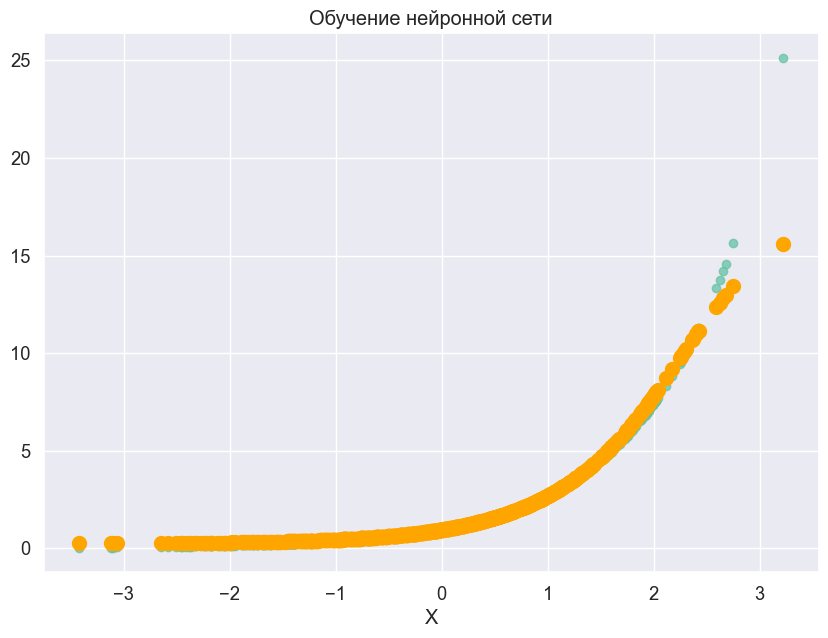

MSE = 0.114


In [11]:
# Forward pass: предсказание модели по данным x_new
y_pred = model(x_new)
# Вычисление оптимизируемой функции (MSE) по предсказаниям
loss = optim_func(y_pred, y_new)
# Визуализация
show_progress(x_init, y_init, y_pred, loss)

Визуализация находится выше, поэтому осталось посчитать MSE для тестовой части данных. Вначале нужно создать и подготовить тестовые данные.

In [12]:
# Задание размера тестовых данных
test_size = int(1e6)

# Создание данных
x_test = sps.norm.rvs(size=(sample_size, 1))
y_test = np.exp(x_test)

# Подготовка данных
x_test_ready = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_ready = torch.FloatTensor(y_test).reshape(-1, 1)

Теперь можно визуализировать результат работы обучения на тестовых данных.

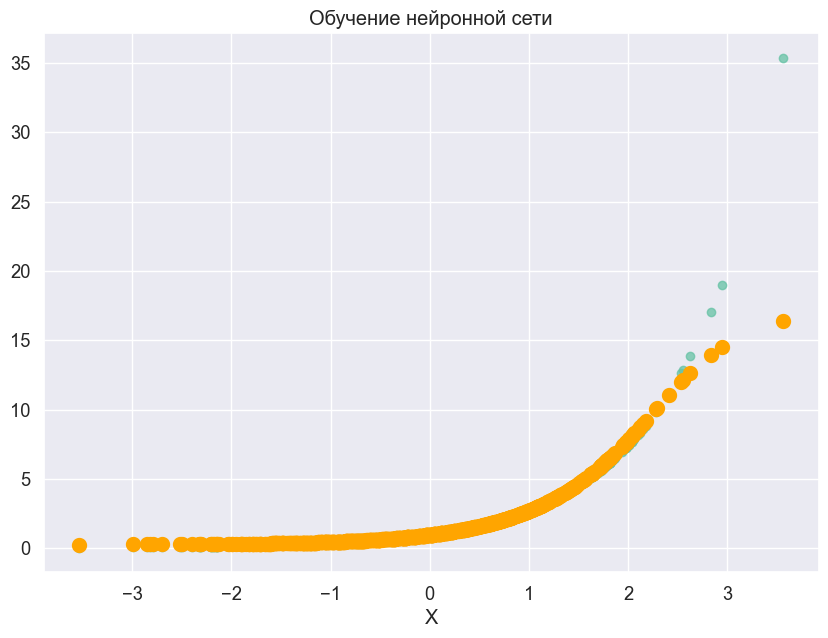

MSE = 0.403


In [13]:
# Предсказание модели
y_test_pred = model(x_test_ready)

# Подсчет MSE для тестовых данных
loss_test = optim_func(y_test_pred, y_test_ready)

# Визуализация графика и MSE
show_progress(x_test_ready, y_test_ready, y_test_pred, loss_test)

**Вывод:**: Данная задание показало, как работает обучение модели с помощью pytorch. Обученная модель работает неплохо, так как и на тестовой части функция ошибки не слишком велика.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Вначале построим нейронную сеть самостоятельно. Что для этого нужно сделать:
1) Создать массив коэффициентов
2) Прямой проход: считаем предсказание
3) Вычисление оптимизирующей функции
4) Подсчет градиентов
5) Шаг оптимизации

In [15]:
# заводим массив для обучаемых данных
# train_coef = [w11, w12, w21, w22, b11, b12, b2]
train_coef = np.random.rand(7)
train_coef

array([0.10521569, 0.42170989, 0.21646674, 0.78294787, 0.38587677,
       0.71994235, 0.10886053])

In [16]:
# Функция сигмоиды
def Sigmoid(X):
    return 1 / (1 + np.exp(-X))

# Функция подсчета предположения
def Predict(X, coef):
    '''
    Функция подсчета предсказания значения заданной функции
    X - входные данные,
    coef - коэффициенты при подсчете 
    '''
    u1 = Sigmoid(X * coef[0] + coef[4])
    u2 = Sigmoid(X * coef[1] + coef[5])
    return u1 * coef[1] + u2 * coef[3] + coef[5]

In [17]:
# Функция для оптимизации
def optim_mse(y, y_predicted):
    return np.mean((y - y_predicted) ** 2)

In [18]:
def find_grad(x, y, coef):
    '''
    Функция подсчета градиента
    x, y - входные данные
    coef - коэффициенты, по которым нужно считать градиент
    
    g_obj_by - градиента obj по by 
    '''
    
    # Подготовка данных для подсчета градиента 2‑го слоя
    g_mse_pred_i = 2 * (Predict(x, coef) - y)
    a1 = x * coef[0] + coef[4]
    a2 = x * coef[1] + coef[5]
    u1 = Sigmoid(a1)
    u2 = Sigmoid(a2)
    
    # Градиенты 2-го слоя
    g_w21 = np.mean(g_mse_pred_i * u1)
    g_w22 = np.mean(g_mse_pred_i * u2)
    g_b2 = np.mean(g_mse_pred_i)

    # Подготовка данных для подсчета градиента 1-го слоя
    g_pred_i_u1 = coef[2]
    g_pred_i_u2 = coef[3]
    g_sigmoid_a1 = np.exp(a1) / ((1 + np.exp(a1))**2)
    g_sigmoid_a2 = np.exp(a2) / ((1 + np.exp(a2))**2)
    g_u1_w11 = g_sigmoid_a1 * x
    g_u2_w12 = g_sigmoid_a2 * x
    g_u1_b11 = g_sigmoid_a1
    g_u2_b12 = g_sigmoid_a2
    
    # Градиенты 1-го слоя
    g_w11 = np.mean(g_mse_pred_i * g_pred_i_u1 * g_u1_w11)
    g_w12 = np.mean(g_mse_pred_i * g_pred_i_u2 * g_u2_w12)
    g_b11 = np.mean(g_mse_pred_i * g_pred_i_u1 * g_u1_b11)
    g_b12 = np.mean(g_mse_pred_i * g_pred_i_u2 * g_u2_b12)
    
    return np.array([g_w11, g_w12, g_w21, g_w22, g_b11, g_b12, g_b2])

In [19]:
# Шаг оптимизации со скоростью train_speed
def optimize_step(x, y, coef, train_speed):
    return coef - train_speed * find_grad(x, y, coef)

In [20]:
# Подготовка данных
x_train_self = np.array(x_init)
y_train_self = np.array(y_init)

In [21]:
# Количество итераций
num_iter = 10000

# Скорость обучения
train_speed = 0.015
for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred_self = Predict(x_train_self, train_coef)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_self = optim_mse(y_pred_self, y_train_self)

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    train_coef = optimize_step(x_train_self, y_train_self, train_coef, train_speed)

Теперь реализуем линейную регрессию с помощью библиотеки sklearn

In [22]:
linear_model = LinearRegression(fit_intercept=True)  # объявляем модель
linear_model.fit(x_init, y_init)  # обучаем

LinearRegression()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [23]:
# Создание тестовых данных
x_test_final = np.array(sps.norm.rvs(size=(10000, 1)))
y_test_final = np.exp(x_test_final)

Pytorch: MSE = 0.28638550639152527.3f
Собственная: MSE = 0.788980332595559.3f
Linear Regression: MSE = 1.7719428812504054


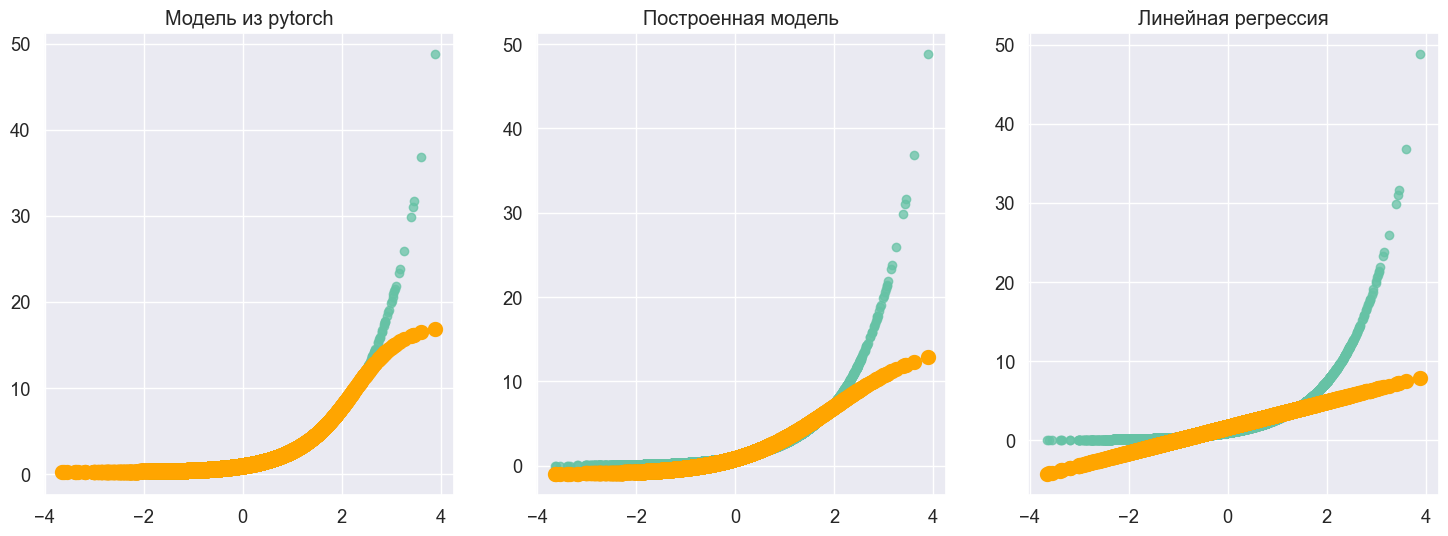

In [24]:
def DrawResults(x, y, coef, pytorch_model, lin_model):
    '''
    Функция визуализирует предположение трех оюученных моделей
    x, y - некоторое количество точек функции, по которой обучены модели
    coef - коэффициенты для собственной модели 
    '''
    
    # Построим поле для графиков предсказаний моделей
    plt.figure(figsize=(18, 6))

    # Модель из библиотеки pytorch
    plt.subplot(131)
    x_fit = torch.FloatTensor(x).reshape(-1, 1)
    y_pytorch = pytorch_model(x_fit)
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pytorch.detach(), color='orange', linewidth=5)
    plt.title('Модель из pytorch')

    # Модель построенная самостоятельно при помощи библиотеки numpy
    plt.subplot(132)
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, Predict(x, coef), color='orange', linewidth=5)
    plt.title('Построенная модель')

    # Линейная регрессия из sklearn
    plt.subplot(133)
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, lin_model.predict(x.reshape(-1, 1)), color='orange', linewidth=5)
    plt.title('Линейная регрессия')

    # Посчитаем MSE для всех моделей
    y_pytorch_mse = torch.FloatTensor(y).reshape(-1, 1)
    pytorch_mse = optim_func(y_pytorch, y_pytorch_mse)
    own_mse = optim_mse(y, Predict(x, coef))
    lin_mse = metrics.mean_squared_error(y, lin_model.predict(x))

    # Выведем результаты
    print(f'Pytorch: MSE = {pytorch_mse}.3f')
    print(f'Собственная: MSE = {own_mse}.3f')
    print(f'Linear Regression: MSE = {lin_mse}')

    plt.show()

DrawResults(x_test_final, y_test_final, train_coef, model, linear_model)

Повторите вычисления для другой нелинейной функции $y(x)$.

Теперь сделаю тоже самое, только для другой функции - $y(x)=x^3$

In [25]:
# Создание самой функции
x_log = sps.norm.rvs(size=(sample_size, 1))
y_log = x_log ** 3

# Подготовка данных для модели pytorch
x_log_train_pytorch = torch.FloatTensor(x_log).reshape(-1, 1)
y_log_train_pytorch = torch.FloatTensor(y_log).reshape(-1, 1)

# Подготовка данных для собственной модели
x_log_train_own = np.array(x_log)
y_log_train_own = np.array(y_log)
log_coef = np.random.rand(7)


# Количество итераций для обучения моделей
num_iter = 5000

Вначале обучим модель из pytorch

In [26]:
# собираем модули в последовательность
model_log_pytorch = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

# Создание инструментов для оптимизации рещультатов модели
optimizer_log = torch.optim.SGD(model_log_pytorch.parameters(), lr=0.015)
optim_func_log = nn.MSELoss()

for i in range(num_iter):
    # Шаг оптимизации
    y_pred = model_log_pytorch(x_log_train_pytorch)
    loss = optim_func_log(y_pred, y_log_train_pytorch)
    loss.backward()
    optimizer_log.step()
    optimizer_log.zero_grad()


Обучение собственной модели

In [27]:
train_speed = 0.015
for i in range(num_iter):
    # Шаг Итерации
    log_coef = optimize_step(x_log_train_own, y_log_train_own, log_coef, train_speed)

Обучение линейное регресии

In [28]:
linear_model_log = LinearRegression(fit_intercept=True)  # объявляем модель
linear_model_log.fit(x_log, y_log)  # обучаем

LinearRegression()

Обучив модели, можно визуализировать результаты на тестовой выборке, но вначале нужно создать ее

In [29]:
# Создание тренировочной выборки
x_log_test = np.array(sps.norm.rvs(size=(10000, 1)))
y_log_test = x_log_test ** 3

Pytorch: MSE = 2.347938299179077.3f
Собственная: MSE = 6.18018330611407.3f
Linear Regression: MSE = 5.656968789626916


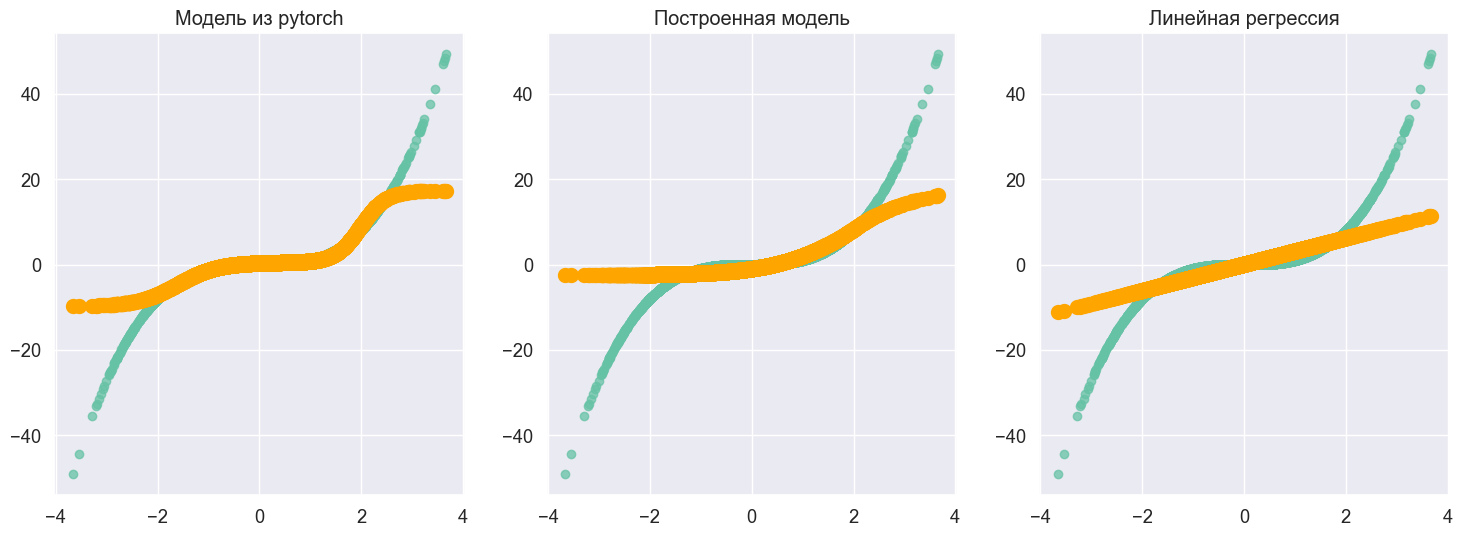

In [30]:
DrawResults(x_log_test, y_log_test, log_coef, model_log_pytorch, linear_model_log)

**Вывод:**: В данной работе были реализованы несколько видов моделей: из pytorch, собственная и линейная регрессия. Лучше всего себя показывает модель из pytorch, а хуже всего линейная регрессия, при этом собственная не сильно уступает библиотечной, но библиотечная обучается намного быстрее, поэтому при фиксированном числе итераций MSE у модели из pytorch лучше, чему у реализованной через numpy.